In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import utils
from constants import *

###  Agile Octopus London Home Electricity Prices, pounds per kilowatt-hour
Source: [My Smart Energy](https://mysmartenergy.uk/Download-Data/London)

If you have your half hourly consumption data from your smart meter you can use this Agile Octopus Prices file to check what your bill would be with this tariff. Both Local (including British Summer Time) and UTC (GMT) times are shown, please choose the correct column when matching to your consumption data. Prices are shown both with and without VAT added. When comparing bills please also note the daily standing charges.

#### Each 24 hour day would have two half hour measurements, so 48 data points in a day 


In [2]:
half_hourly_prices = pd.read_csv(f"{DATA_FOLDER}/agile_octopus_london.csv")
half_hourly_prices.head()


,Valid_From_UTC,Valid_To_UTC,Valid_From_Local,Valid_To_Local,Price_Inc_VAT,Price_Ex_VAT
0,9/29/22 4:30,9/29/22 5:00,9/29/22 5:30,9/29/22 6:00,38.38,36.55
1,9/29/22 5:00,9/29/22 5:30,9/29/22 6:00,9/29/22 6:30,37.80,36.00
2,9/29/22 5:30,9/29/22 6:00,9/29/22 6:30,9/29/22 7:00,54.85,52.24
3,9/29/22 6:00,9/29/22 6:30,9/29/22 7:00,9/29/22 7:30,48.38,46.08
4,9/29/22 6:30,9/29/22 7:00,9/29/22 7:30,9/29/22 8:00,55.00,52.38


In [3]:
len(half_hourly_prices)

31207

In [4]:
date_column= 'Valid_From_UTC'
data_column = 'Price_Ex_VAT'
half_hourly_prices[date_column] = pd.to_datetime(half_hourly_prices[date_column])


/var/folders/v1/24qfth9s4hd8jjscffmwx4yw0000gn/T/ipykernel_30105/238797309.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  half_hourly_prices[date_column] = pd.to_datetime(half_hourly_prices[date_column])


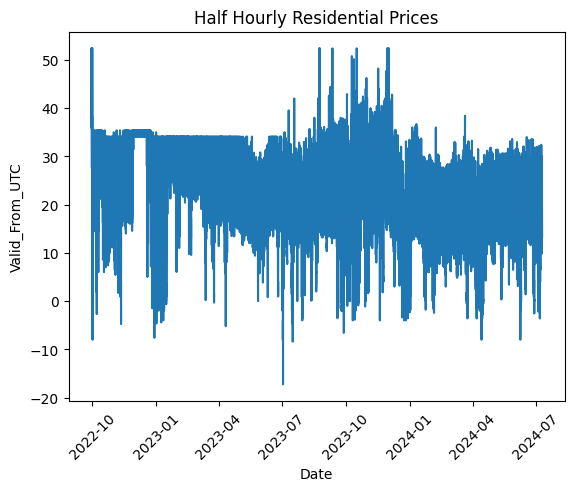

In [5]:
# Graph the daily average system price from 2020 to June 2024

plt.plot(half_hourly_prices[date_column], half_hourly_prices[data_column])
plt.xlabel('Date')
plt.ylabel(date_column)
plt.title('Half Hourly Residential Prices')
plt.xticks(rotation=45)
plt.show()


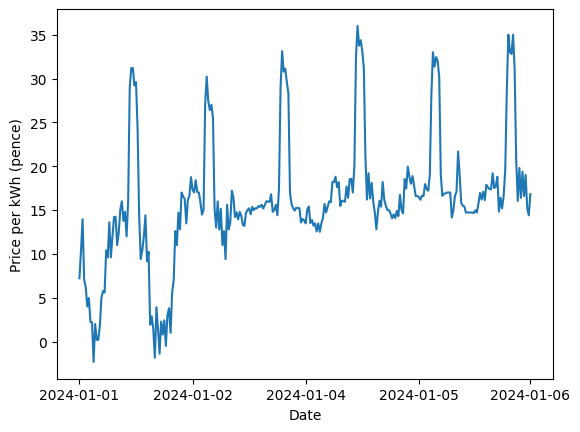

In [6]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Filter the data for the desired date range
start_date = '2024-01-01'
end_date = '2024-01-07'
filtered_data = half_hourly_prices[(half_hourly_prices[date_column] >= start_date) & (half_hourly_prices[date_column] < end_date)]
num_data_points = len(filtered_data)

# Create the plot
fig, ax = plt.subplots()

ax.plot(filtered_data[date_column], filtered_data[data_column])
ax.set_xlabel('Date')
ax.set_ylabel("Price per kWh (pence)")

# Calculate positions for 0%, 25%, 50%, 75%, and 100% of the dataset
ticks_positions = [
    filtered_data[date_column].iloc[0],                           # 0%
    filtered_data[date_column].iloc[num_data_points // 4],        # 25%
    filtered_data[date_column].iloc[num_data_points // 2],        # 50%
    filtered_data[date_column].iloc[3 * num_data_points // 4],    # 75%
    filtered_data[date_column].iloc[-1]                           # 100%
]

# Set the custom tick positions
ax.set_xticks(ticks_positions)

# Format the dates to appear horizontally and shorten the format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Ensure the date labels appear horizontally
plt.xticks(rotation=0)

# Save and display the plot
plt.savefig("results/plots/one_week.png", dpi=300)
plt.show()

## Alpha

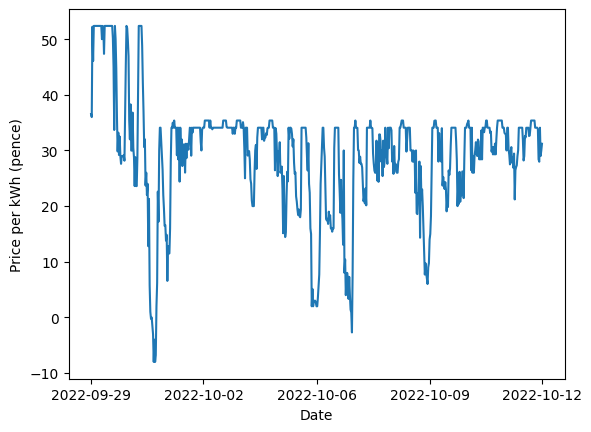

In [7]:
# Filter the data for the desired date range
start_date = '2022-09-29'
end_date = '2022-10-13'
filtered_data = half_hourly_prices[(half_hourly_prices[date_column] >= start_date) & (half_hourly_prices[date_column] < end_date)]
num_data_points = len(filtered_data)

# Create the plot
fig, ax = plt.subplots()

ax.plot(filtered_data[date_column], filtered_data[data_column])
ax.set_xlabel('Date')
ax.set_ylabel("Price per kWh (pence)")

# Calculate positions for 0%, 25%, 50%, 75%, and 100% of the dataset
ticks_positions = [
    filtered_data[date_column].iloc[0],                           # 0%
    filtered_data[date_column].iloc[num_data_points // 4],        # 25%
    filtered_data[date_column].iloc[num_data_points // 2],        # 50%
    filtered_data[date_column].iloc[3 * num_data_points // 4],    # 75%
    filtered_data[date_column].iloc[-1]                           # 100%
]

# Set the custom tick positions
ax.set_xticks(ticks_positions)

# Format the dates to appear shortened and rotated at 45 degrees for better readability
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Rotate the date labels slightly for readability in a 2-week range
plt.xticks(rotation=0)

# Set the title for the plot
# plt.title(f'Residential Electricity Prices - Dataset Alpha (2 weeks, {num_data_points} samples)')

# Save and display the plot
plt.savefig("results/plots/alpha.png", dpi=300)
plt.show()

## Beta

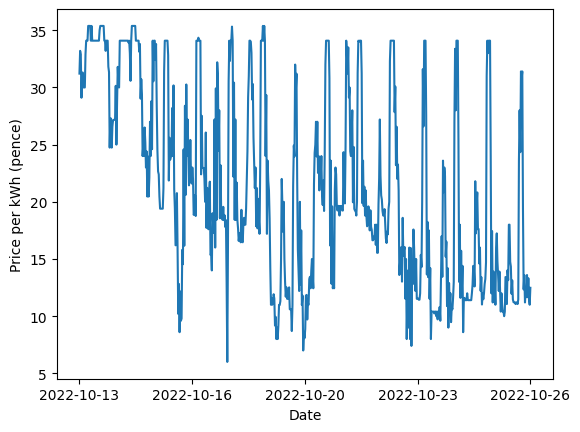

In [8]:
# Filter the data for the desired date range
start_date = '2022-10-13'
end_date = '2022-10-27'
filtered_data = half_hourly_prices[(half_hourly_prices[date_column] >= start_date) & (half_hourly_prices[date_column] < end_date)]
num_data_points = len(filtered_data)

# Create the plot
fig, ax = plt.subplots()

ax.plot(filtered_data[date_column], filtered_data[data_column])
ax.set_xlabel('Date')
ax.set_ylabel("Price per kWh (pence)")

# Calculate positions for 0%, 25%, 50%, 75%, and 100% of the dataset
ticks_positions = [
    filtered_data[date_column].iloc[0],                           # 0%
    filtered_data[date_column].iloc[num_data_points // 4],        # 25%
    filtered_data[date_column].iloc[num_data_points // 2],        # 50%
    filtered_data[date_column].iloc[3 * num_data_points // 4],    # 75%
    filtered_data[date_column].iloc[-1]                           # 100%
]

# Set the custom tick positions
ax.set_xticks(ticks_positions)

# Format the dates to appear shortened and rotated at 45 degrees for better readability
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Rotate the date labels slightly for readability in a 2-week range
plt.xticks(rotation=0)

# Set the title for the plot
# plt.title(f'Residential Electricity Prices - Dataset Beta (2 weeks, {num_data_points} samples)')

# Save and display the plot
plt.savefig("results/plots/beta.png", dpi=300)
plt.show()

## Delta

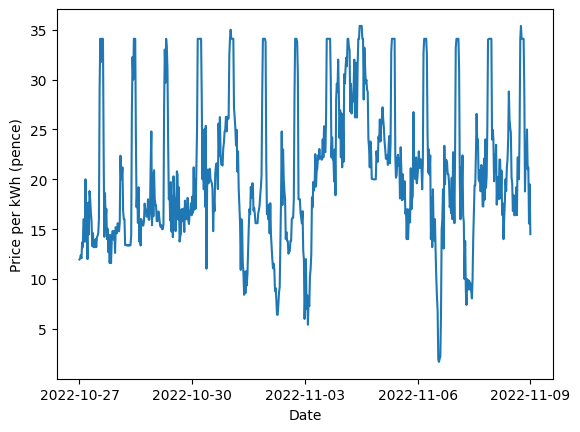

In [9]:

# Filter the data for the desired date range
start_date = '2022-10-27'
end_date = '2022-11-10'
filtered_data = half_hourly_prices[(half_hourly_prices[date_column] >= start_date) & (half_hourly_prices[date_column] < end_date)]
num_data_points = len(filtered_data)

# Create the plot
fig, ax = plt.subplots()

ax.plot(filtered_data[date_column], filtered_data[data_column])
ax.set_xlabel('Date')
ax.set_ylabel("Price per kWh (pence)")

# Calculate positions for 0%, 25%, 50%, 75%, and 100% of the dataset
ticks_positions = [
    filtered_data[date_column].iloc[0],                           # 0%
    filtered_data[date_column].iloc[num_data_points // 4],        # 25%
    filtered_data[date_column].iloc[num_data_points // 2],        # 50%
    filtered_data[date_column].iloc[3 * num_data_points // 4],    # 75%
    filtered_data[date_column].iloc[-1]                           # 100%
]

# Set the custom tick positions
ax.set_xticks(ticks_positions)

# Format the dates to appear shortened and rotated at 45 degrees for better readability
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Rotate the date labels slightly for readability in a 2-week range
plt.xticks(rotation=0)

# Set the title for the plot
# plt.title(f'Residential Electricity Prices - Dataset Delta (2 weeks, {num_data_points} samples)')

# Save and display the plot
plt.savefig("results/plots/delta.png", dpi=300)
plt.show()


## One Week of Context

= = = > Chronos pipeline not initialized. Firing up chronos-t5-tiny-336-48-20_000-alpha pipeline. May take time..
Version is chronos-t5-tiny-336-48-20_000-alpha


/opt/homebrew/lib/python3.12/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/opt/homebrew/lib/python3.12/site-packages/transformers/generation/logits_process.py:156: UserWarning: The operator 'aten::isin.Tensor_Tensor_out' is not currently supported on the MPS backend and will fall back to run on the CPU. This may have performance implications. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/mps/MPSFallback.mm:13.)
  eos_token_mask = torch.isin(vocab_tensor, eos_token_id)


chronos-t5-tiny-336-48-20_000-alpha

Results comparison for Price_Ex_VAT:

MSE
- chronos-t5-tiny-336-48-20_000-alpha MSE: 51.5570783448106
NMSE
- chronos-t5-tiny-336-48-20_000-alpha NMSE: 1.550061842245991



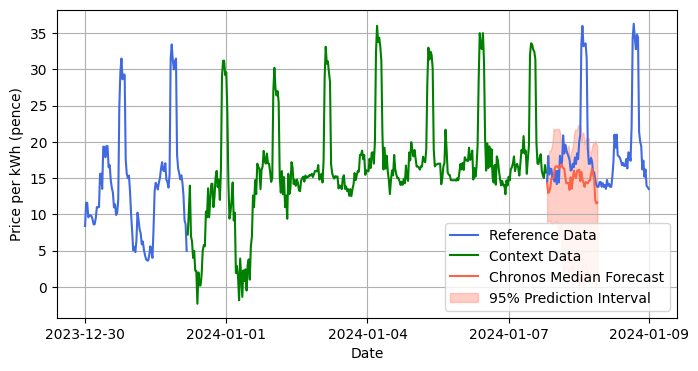

In [10]:
start_date = '2024-01-01'
end_date = '2024-01-08'
prediction_length = 48
date_column
_ = utils.compare_prediction_methods(half_hourly_prices,data_column, date_column,start_date,end_date,prediction_length,methods=['chronos-t5-tiny-336-48-20_000-alpha'],run_name="one_week")


= = = > Chronos pipeline not initialized. Firing up chronos_tiny pipeline. May take time..
Version is chronos_tiny


/opt/homebrew/lib/python3.12/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


chronos_tiny
= = = > Chronos pipeline not initialized. Firing up chronos_mini pipeline. May take time..
Version is chronos_mini


/opt/homebrew/lib/python3.12/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


chronos_mini


/opt/homebrew/lib/python3.12/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


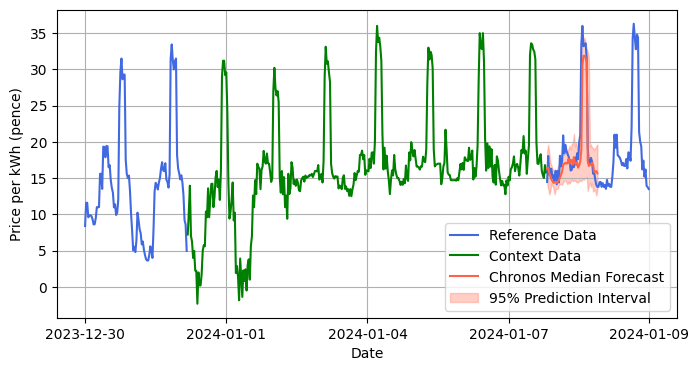

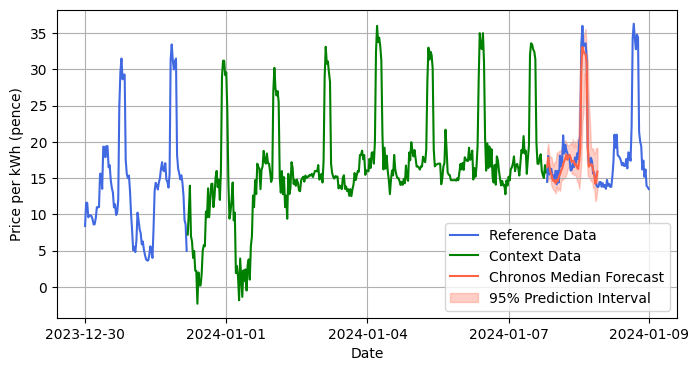

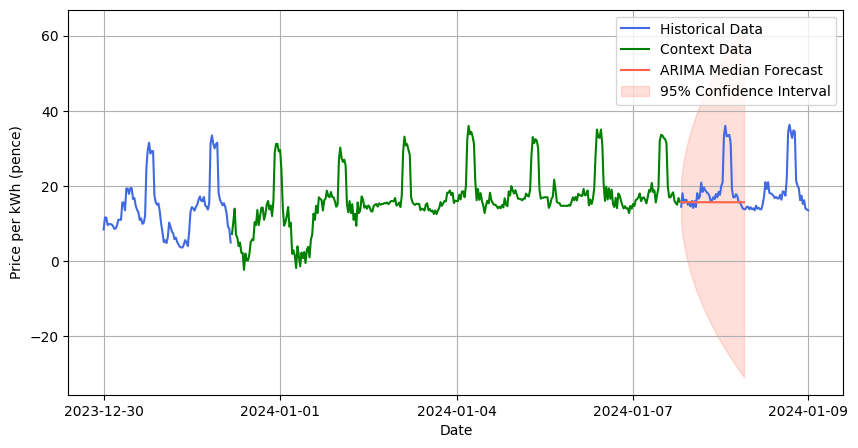

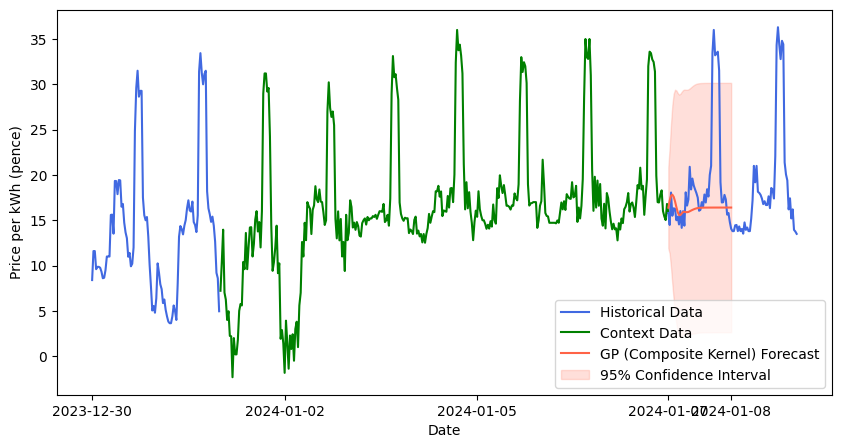

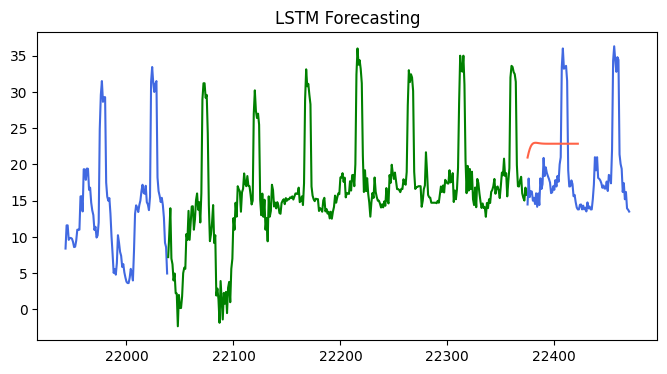


Results comparison for Price_Ex_VAT:

MSE
- chronos_tiny MSE: 7.344838838953776
- chronos_mini MSE: 2.0593756348588097
- arima MSE: 44.15473405320429
- gp MSE: 40.241242055653515
- lstm MSE: 47.43313050060825
NMSE
- chronos_tiny NMSE: 0.22082233491911063
- chronos_mini NMSE: 0.06191505983129577
- arima NMSE: 1.327510607809308
- gp NMSE: 1.209851601323944
- lstm NMSE: 1.4260754877446962



In [11]:

_ = utils.compare_prediction_methods(half_hourly_prices,data_column, date_column,start_date,end_date,prediction_length,methods=['chronos_tiny','chronos_mini','arima','gp','lstm'],run_name="one_week")

## Two Weeks of Context

= = = > Chronos pipeline not initialized. Firing up chronos_tiny pipeline. May take time..
Version is chronos_tiny


/opt/homebrew/lib/python3.12/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


chronos_tiny
= = = > Chronos pipeline not initialized. Firing up chronos_mini pipeline. May take time..
Version is chronos_mini


/opt/homebrew/lib/python3.12/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


chronos_mini


/opt/homebrew/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/homebrew/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/opt/homebrew/lib/python3.12/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


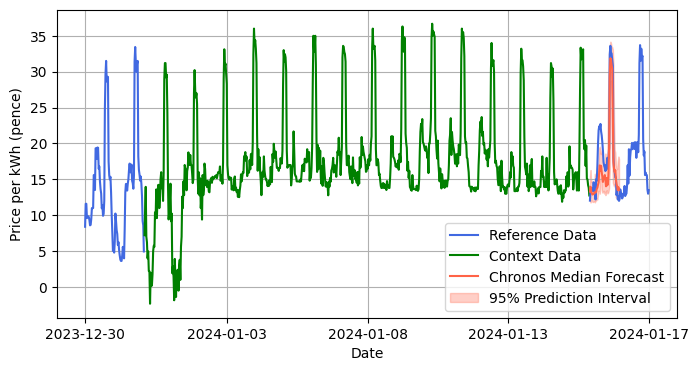

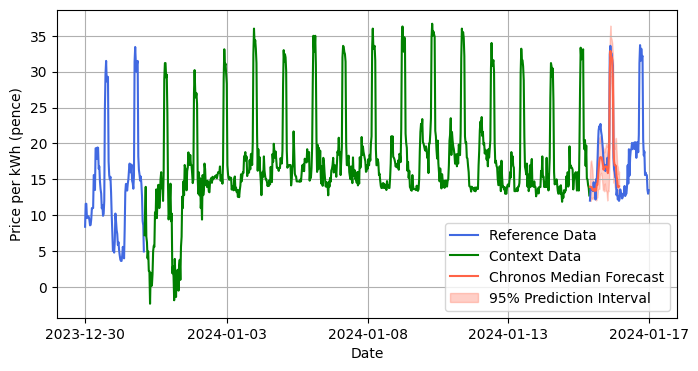

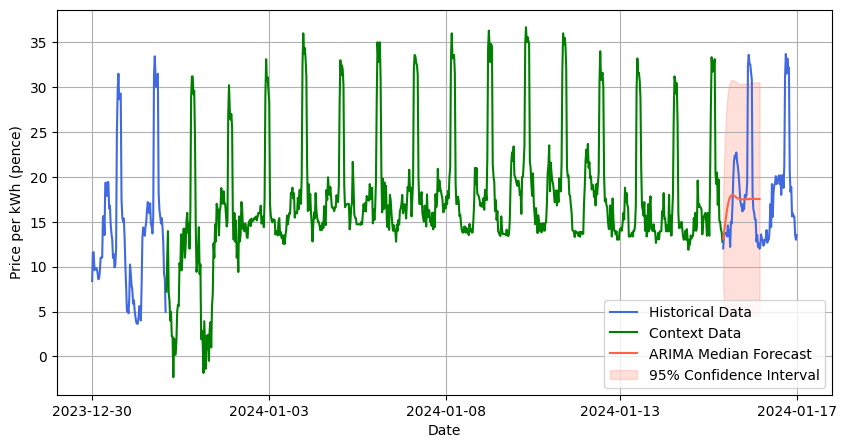

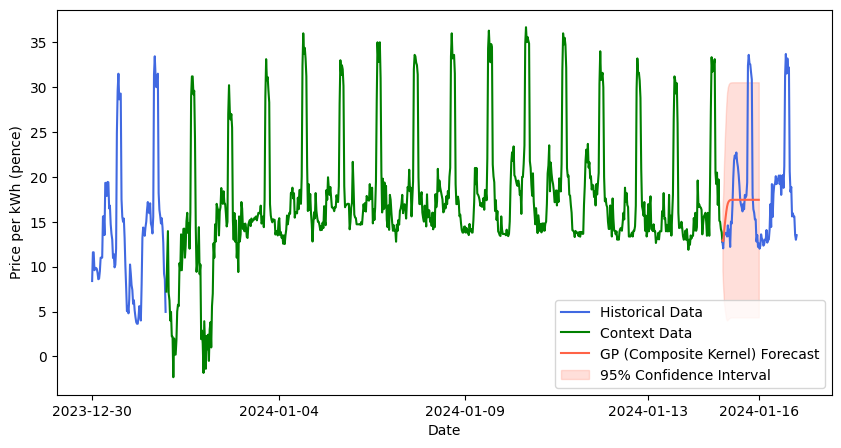

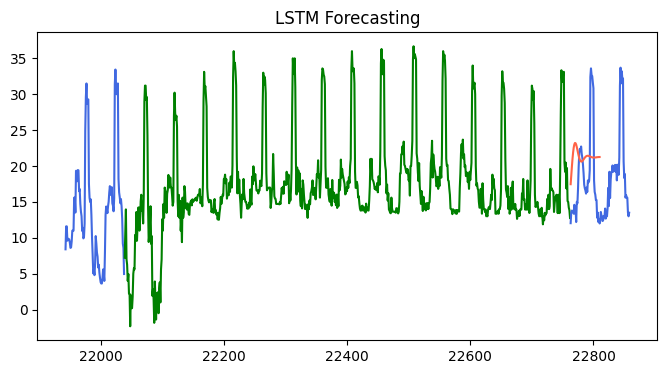


Results comparison for Price_Ex_VAT:

MSE
- chronos_tiny MSE: 8.882439430921135
- chronos_mini MSE: 4.516562063953265
- arima MSE: 34.85390561812266
- gp MSE: 35.045648567867325
- lstm MSE: 46.32633227913036
NMSE
- chronos_tiny NMSE: 0.24526916096850987
- chronos_mini NMSE: 0.1247149948505913
- arima NMSE: 0.9624144643951782
- gp NMSE: 0.9677090270849935
- lstm NMSE: 1.2792004648291062



In [12]:
start_date = '2024-01-01'
end_date = '2024-01-16'
prediction_length = 48

_ = utils.compare_prediction_methods(half_hourly_prices,data_column, date_column,start_date,end_date,prediction_length,methods=['chronos_tiny','chronos_mini','arima','gp','lstm'],run_name="two_weeks")

# Three Weeks of Context

= = = > Chronos pipeline not initialized. Firing up chronos_tiny pipeline. May take time..
Version is chronos_tiny


/opt/homebrew/lib/python3.12/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


chronos_tiny
= = = > Chronos pipeline not initialized. Firing up chronos_mini pipeline. May take time..
Version is chronos_mini


/opt/homebrew/lib/python3.12/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


chronos_mini


/opt/homebrew/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/homebrew/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/homebrew/lib/python3.12/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


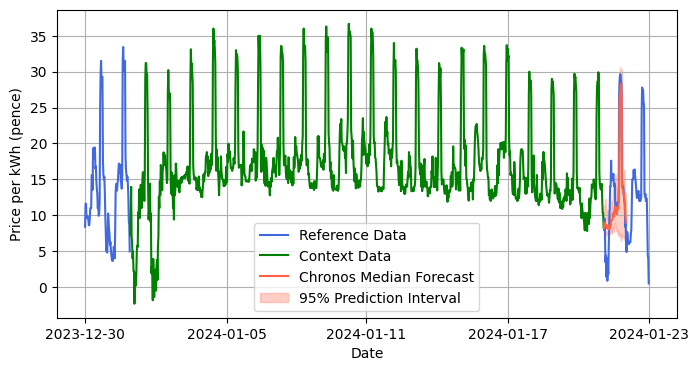

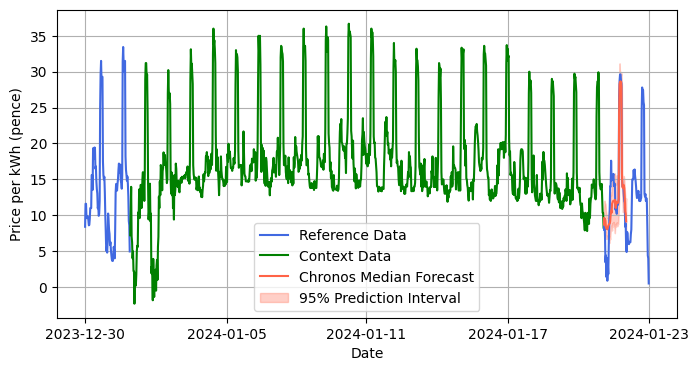

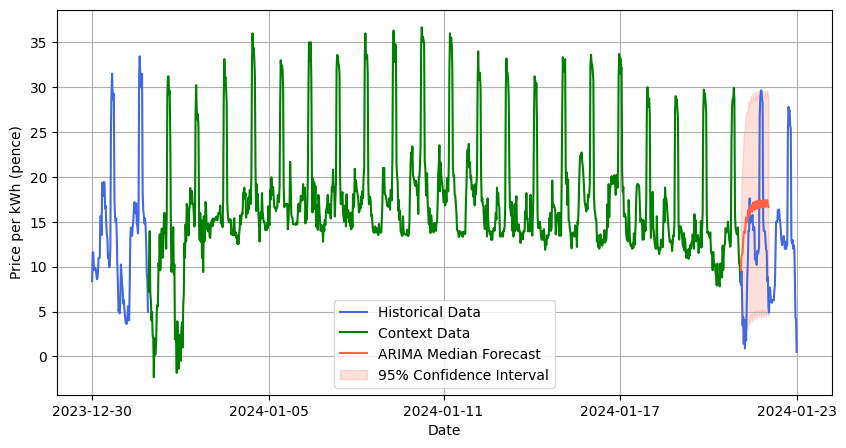

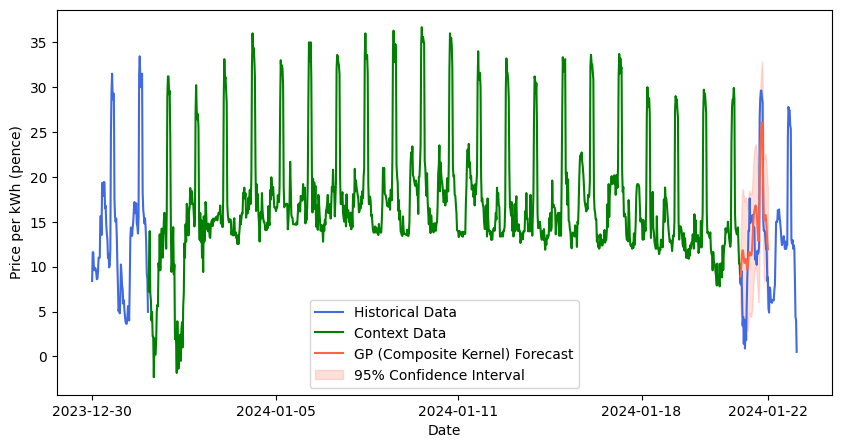

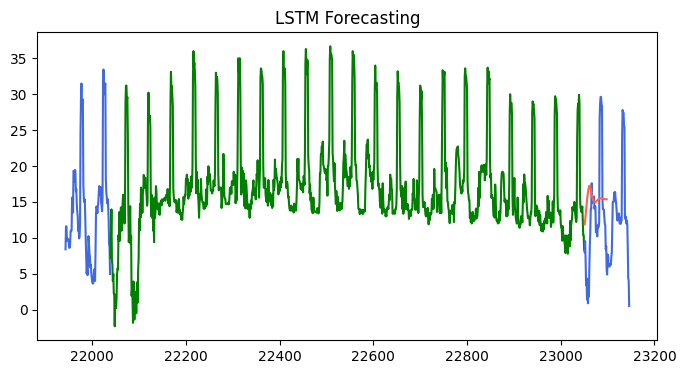


Results comparison for Price_Ex_VAT:

MSE
- chronos_tiny MSE: 16.071873943411358
- chronos_mini MSE: 9.820050308274295
- arima MSE: 52.69045840312504
- gp MSE: 29.187699707658453
- lstm MSE: 60.64238321731299
NMSE
- chronos_tiny NMSE: 0.30229777275495046
- chronos_mini NMSE: 0.18470648456957622
- arima NMSE: 0.9910610471924347
- gp NMSE: 0.548994886628177
- lstm NMSE: 1.1406297389895286



In [13]:
start_date = '2024-01-01'
end_date = '2024-01-22'
prediction_length = 48

_ = utils.compare_prediction_methods(half_hourly_prices,data_column, date_column,start_date,end_date,prediction_length,methods=['chronos_tiny','chronos_mini','arima','gp','lstm'],run_name="three_weeks")

# One Month of Context

= = = > Chronos pipeline not initialized. Firing up chronos_tiny pipeline. May take time..
Version is chronos_tiny


/opt/homebrew/lib/python3.12/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


chronos_tiny
= = = > Chronos pipeline not initialized. Firing up chronos_mini pipeline. May take time..
Version is chronos_mini


/opt/homebrew/lib/python3.12/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


chronos_mini


/opt/homebrew/lib/python3.12/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


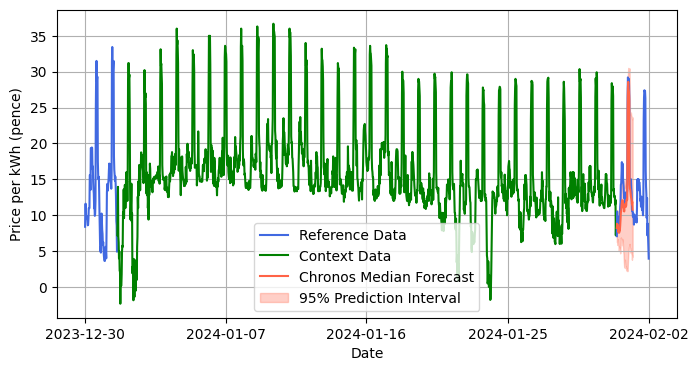

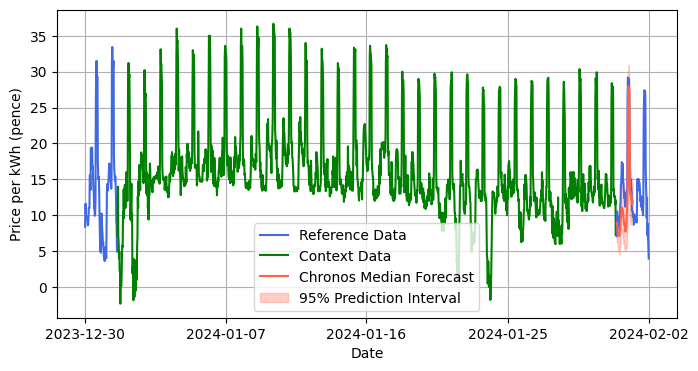

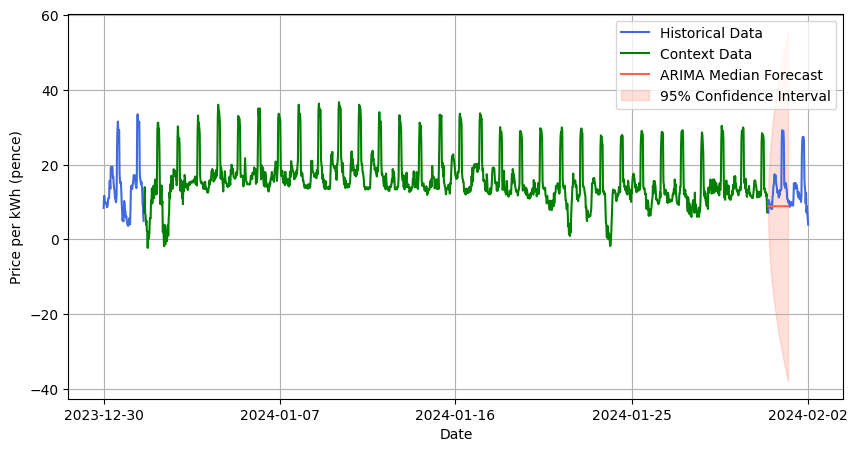

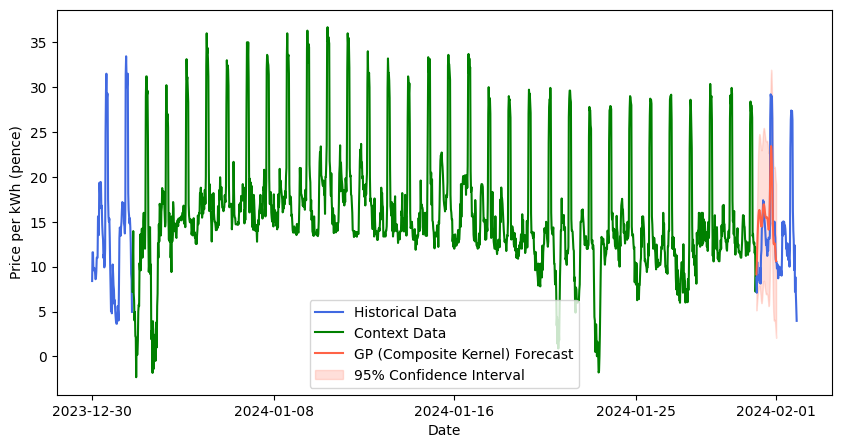

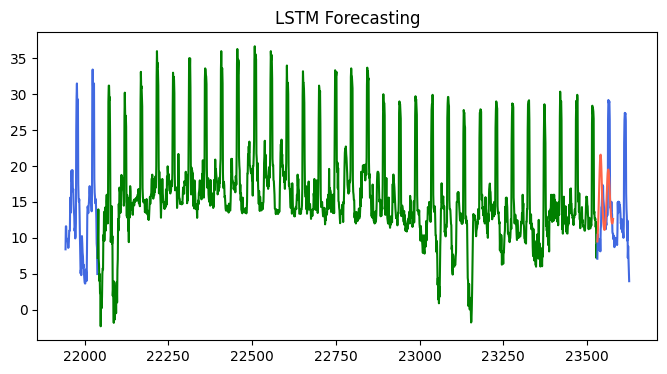


Results comparison for Price_Ex_VAT:

MSE
- chronos_tiny MSE: 4.595314201557037
- chronos_mini MSE: 13.671715292234175
- arima MSE: 63.194192159215696
- gp MSE: 16.545062859766357
- lstm MSE: 33.813949514611416
NMSE
- chronos_tiny NMSE: 0.13883823287680833
- chronos_mini NMSE: 0.41306354871783857
- arima NMSE: 1.9092861951616145
- gp NMSE: 0.4998760018427792
- lstm NMSE: 1.0216208927789008



In [14]:
start_date = '2024-01-01'
end_date = '2024-02-01'
prediction_length = 48

_ = utils.compare_prediction_methods(half_hourly_prices,data_column, date_column,start_date,end_date,prediction_length ,methods=['chronos_tiny','chronos_mini','arima','gp','lstm'],run_name="one_month")

Real World Case Study